In [2]:
import numpy as np

with np.load('Indian-celeb-embeddings.npz') as data:
    print(data.files)


['arr_0', 'arr_1']


In [4]:
import numpy as np

with np.load('Indian-celeb-embeddings.npz') as data:
    embeddings = data['arr_0']
    labels = data['arr_1']

print("Embeddings shape:", embeddings.shape)
print("Embeddings dtype:", embeddings.dtype)
print("Labels shape:", labels.shape)
print("Labels dtype:", labels.dtype)


Embeddings shape: (1538, 128)
Embeddings dtype: float32
Labels shape: (1538,)
Labels dtype: <U20


In [5]:
import cv2
import numpy as np
from mtcnn.mtcnn import MTCNN
from keras.models import load_model

In [7]:
# Load MTCNN face detector
detector = MTCNN()

# Load Facenet model
facenet_model = load_model('facenet_model.h5')

# Load face embeddings and labels from npz file
with np.load('Indian-celeb-embeddings.npz') as data:
    embeddings = data['arr_0']
    labels = data['arr_1']


c:\Users\anilj.ANIL_JOSEPH\anaconda3\envs\machine_test\lib\site-packages\keras\layers\core\lambda_layer.py:327: UserWarning: deepface.models.facial_recognition.Facenet is not loaded, but a Lambda layer uses it. It may cause errors.
  function = cls._parse_function_from_config(


In [8]:
# Define function to extract face embeddings
def extract_face_embeddings(face):
    face = cv2.resize(face, (160, 160))
    face = face.astype('float32') / 255.0
    face = np.expand_dims(face, axis=0)
    embedding = facenet_model.predict(face)
    return embedding

# Define function to recognize faces
def recognize_faces(face_embeddings):
    distances = np.linalg.norm(face_embeddings - embeddings, axis=1)
    indices = np.argmin(distances)
    return labels[indices]

In [9]:
# Load image file
image_path = 'Yami_Gautam_3.jpg'
image = cv2.imread(image_path)

In [10]:

if image is None:
    print(f"Error: Unable to load image file '{image_path}'")
else:
    # Detect faces in the image
    faces = detector.detect_faces(image)

    # Extract face embeddings and recognize faces
    for face in faces:
        x, y, width, height = face['box']
        face_image = image[y:y+height, x:x+width]
        embedding = extract_face_embeddings(face_image)
        recognized_label = recognize_faces(embedding)
        cv2.rectangle(image, (x, y), (x+width, y+height), (0, 255, 0), 2)
        cv2.putText(image, recognized_label, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

    # Display the output
    cv2.imshow('Recognized Faces', image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

1/1 [==============================] - 8s 8s/step


error: OpenCV(4.10.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:1301: error: (-2:Unspecified error) The function is not implemented. Rebuild the library with Windows, GTK+ 2.x or Cocoa support. If you are on Ubuntu or Debian, install libgtk2.0-dev and pkg-config, then re-run cmake or configure script in function 'cvShowImage'


c:\Users\anilj.ANIL_JOSEPH\anaconda3\envs\machine_test\lib\site-packages\keras\layers\core\lambda_layer.py:327: UserWarning: deepface.models.facial_recognition.Facenet is not loaded, but a Lambda layer uses it. It may cause errors.
  function = cls._parse_function_from_config(


1/1 [==============================] - 9s 9s/step


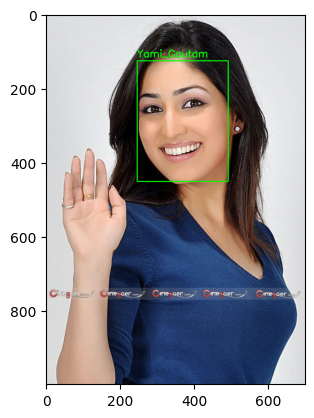

In [11]:
import cv2
import numpy as np
from mtcnn.mtcnn import MTCNN
from keras.models import load_model
import matplotlib.pyplot as plt

# Load MTCNN face detector
detector = MTCNN()

# Load Facenet model
facenet_model = load_model('facenet_model.h5')

# Load face embeddings and labels from npz file
with np.load('Indian-celeb-embeddings.npz') as data:
    embeddings = data['arr_0']
    labels = data['arr_1']

# Define function to extract face embeddings
def extract_face_embeddings(face):
    face = cv2.resize(face, (160, 160))
    face = face.astype('float32') / 255.0
    face = np.expand_dims(face, axis=0)
    embedding = facenet_model.predict(face)
    return embedding

# Define function to recognize faces
def recognize_faces(face_embeddings):
    distances = np.linalg.norm(face_embeddings - embeddings, axis=1)
    indices = np.argmin(distances)
    return labels[indices]

# Load image file
image_path = 'test_image.jpg'
image = cv2.imread(image_path)

if image is None:
    print(f"Error: Unable to load image file '{image_path}'")
else:
    # Detect faces in the image
    faces = detector.detect_faces(image)

    # Extract face embeddings and recognize faces
    for face in faces:
        x, y, width, height = face['box']
        face_image = image[y:y+height, x:x+width]
        embedding = extract_face_embeddings(face_image)
        recognized_label = recognize_faces(embedding)
        cv2.rectangle(image, (x, y), (x+width, y+height), (0, 255, 0), 2)
        cv2.putText(image, recognized_label, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

    # Display the output
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.show()
